# OpenCV 基础操作

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 数据读取-图像
- `cv2.IMREAD_COLOR`：彩色图像
- `cv2.IMREAD_GRAYSCALE`：灰度图像
`cv2`默认读取格式为`BGR`

In [2]:
img = cv2.imread('data/test.png')
img_gray = cv2.imread('data/test.png', cv2.IMREAD_GRAYSCALE)

`[h,w,c]`表示一个图像，[行，列，通道]

In [3]:
def show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 截取部分图像（Region of Interest，ROI）

In [4]:
img_ROI = img[400:700, 300:800]

In [5]:
show('test', img_ROI)

# 颜色通道截取与合并

In [6]:
b, g, r = cv2.split(img)
img_merge = cv2.merge((r, g, b))
show('merge', img_merge)

In [7]:
# 只保留 R 通道
img_R = img.copy()
img_R[:, :, 0] = 0
img_R[:, :, 1] = 0
show('img_R', img_R)

# 边界填充
`cv2.copyMakeBorder()`
- img
- location$\times 4$
- method:
    - `borederType = cv2.BORDER_REPLICATE`：复制边缘像素；
    - `cv2.BORDER_REFLECT`：对称反射；
    - `cv2.BORDER_REFLECT_101`：去掉对称轴的对称反射；
    - `cv2.BORDER_WRAP`：外包装法；
    - `cv2.BORDER_CONSTANT, value = 0`：恒定值；

In [8]:
# 上下左右分别的填充大小值
top_size, bottom_size, left_size, right_size = (100, 100, 100, 100)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT)
reflect_101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT101)
reflect_2 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_CONSTANT, value=233)

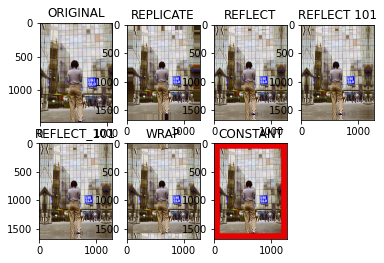

In [9]:
plt.subplot(241), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(242), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(243), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(244), plt.imshow(reflect_101, 'gray'), plt.title('REFLECT 101')
plt.subplot(245), plt.imshow(reflect_2, 'gray'), plt.title('REFLECT_101')
plt.subplot(246), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(247), plt.imshow(constant, 'gray'), plt.title('CONSTANT')
plt.savefig('result/01_Border_diff.png', dpi=300)